# Задачи

1. Проведите извлечение признаков из *wells_info_with_prod.csv* (хоть один из столбцов с датой и категориальным признаком должен остаться). Целевой переменной будет **Prod1Year**
2. Разбейте данные на train и test
3. Отмасштабируйте train (в том числе целевую переменную)
3. Используя модель масштабирования train отмасштабируйте test (использовать метод transform у той же модели масштабирования)

In [9]:
wells_info_with_prod_df.head()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,Prod1Year,ProdAll
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.8004,126898,201325
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321,22616,34625
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841,47523,69009
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020,59474,81048
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414,14427,18050


In [2]:
# 1. Проведите извлечение признаков из wells_info_with_prod.csv (хоть один из столбцов с датой и категориальным признаком должен остаться).           СДАЛА
# Целевой переменной будет Prod1Year
import pandas as pd

wells_info_with_prod_df = pd.read_csv('data\wells_info_with_prod.csv')

x = wells_info_with_prod_df.drop(['API','Prod1Year', 'ProdAll','PermitDate', 'SpudDate',
       'FirstProductionDate', 'operatorNameIHS', 'BasinName',
       'StateName', 'CountyName', 'LatWGS84', 'LonWGS84'], axis=1)

y = wells_info_with_prod_df['Prod1Year']

x['CompletionDate'] = pd.to_datetime(x['CompletionDate'], format='%Y-%m-%d')
x['CompletionDate'] = x['CompletionDate'].apply(lambda x: x.strftime('%Y%m%d'))
x['CompletionDate'] = pd.to_numeric(x['CompletionDate'])
formation = pd.get_dummies(x['formation'])
x = x.drop(columns = 'formation')
x = x.join(formation)
x.head()

,CompletionDate,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,BAKKEN,BONE SPRING,CODELL,NIOBRARA,OSWEGO,SPRABERRY,THREE FORKS,THREE FORKS / BAKKEN,WOLFCAMP,WOLFCAMP UPPER,WOODFORD
0,20141202,39.68445,-104.60557,9005.0,994.6866,591.8004,0,0,0,1,0,0,0,0,0,0,0
1,20140226,40.49692,-104.77859,4195.0,991.5857,628.6321,0,0,0,1,0,0,0,0,0,0,0
2,20140907,40.34780,-104.36863,4273.0,1000.2760,564.4841,0,0,0,1,0,0,0,0,0,0,0
3,20150331,40.17445,-104.52932,7078.0,973.4437,824.0020,0,0,0,1,0,0,0,0,0,0,0
4,20140423,40.49558,-104.86757,3211.0,783.5919,603.1414,0,0,0,1,0,0,0,0,0,0,0


In [4]:
# 2. Разбейте данные на train и test                                  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

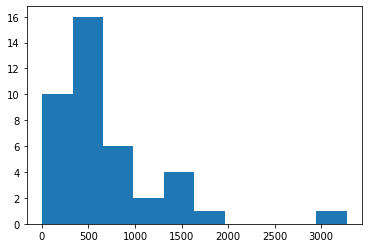

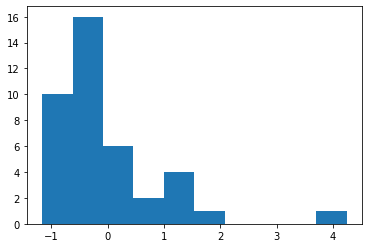

In [5]:
# 3. Отмасштабируйте train (в том числе целевую переменную)   

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler() 

X_train = X_train._get_numeric_data()
scaled_X_train = scaler.fit_transform(X_train)

X_test = X_test._get_numeric_data()
scaled_X_test = scaler.transform(X_test)

plt.hist(X_train['WATER_PER_FOOT'])
plt.show()

plt.hist(scaled_X_train[:,5])
plt.show()
